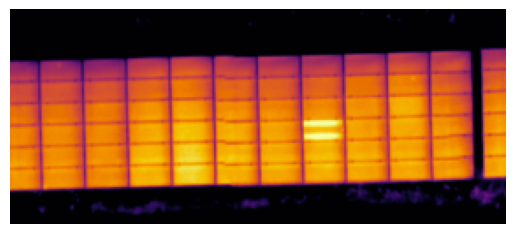

In [298]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

# plt.rcParams['figure.figsize'] = [15, 10]

# Load the image using OpenCV
image_cv = cv2.imread('img/img1.png')

def showimg(img):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

# Convert the image from BGR to RGB format
image_cv_rgb = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib to verify it was loaded correctly
showimg(image_cv_rgb)

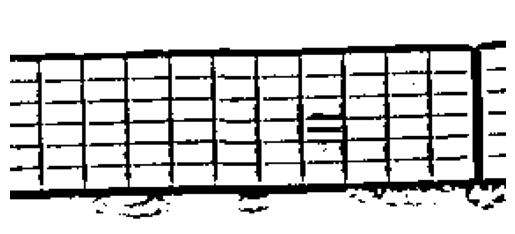

In [299]:
gray = cv2.cvtColor(image_cv, cv2.COLOR_BGR2GRAY)
# threshold the image using neighborhood mean
thresh = cv2.adaptiveThreshold(
    gray,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    15,
    5
)

# show the image
showimg(thresh)

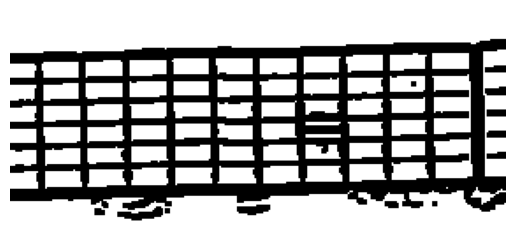

In [300]:
erode = cv2.erode(thresh, None, iterations=1)
showimg(erode)

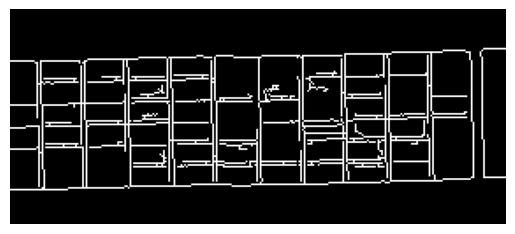

In [301]:
canny = cv2.Canny(gray,0,255)
showimg(canny)

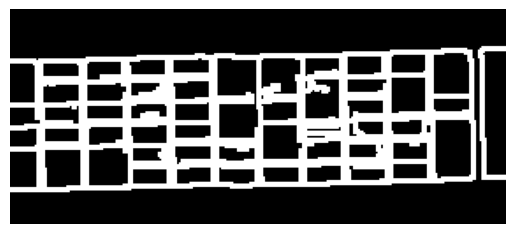

In [302]:
edges = cv2.dilate(canny,None)
showimg(edges)

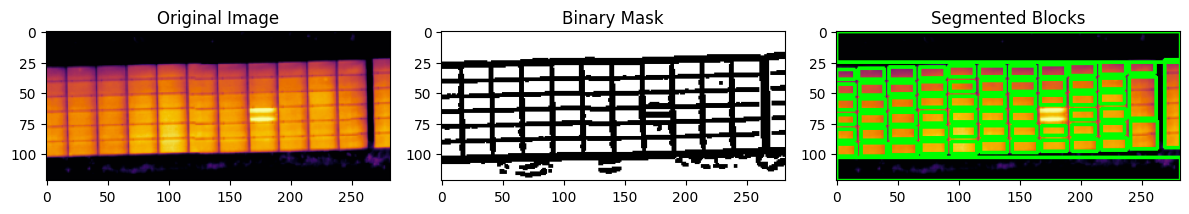

In [303]:
#invert edges
inv_edges = cv2.bitwise_not(edges)
# Find contours
contours, _ = cv2.findContours(erode, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours (bounding boxes) on the _cv
output = image_cv.copy()
for contour in contours:
    # Filter based on area to ignore noise
    if cv2.contourArea(contour) > 50:  # Adjust threshold as needed
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title("Binary Mask")
plt.imshow(erode, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Segmented Blocks")
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()

In [311]:
# for each image in contours crop image and save as new file with new name
for i, contour in enumerate(contours):
    # Filter based on area to ignore noise
    if cv2.contourArea(contour) > 50:  # Adjust threshold as needed
        x, y, w, h = cv2.boundingRect(contour)
        roi = image_cv[y:y+h, x:x+w]
        cv2.imwrite(f"crop/{i}.png", roi)
        print(f"Saved {i}.png")
       


Saved 0.png


error: OpenCV(4.10.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:798: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'
